<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/using-machine-learning-to-predict-anime-quotes?scriptVersionId=104710930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting the quotes with the help of Machine Learning and Deep Learning.

> In this notebook we will going to combine two anime dataset and try predict the quotes said by the particular anime character.

In [1]:
import re
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset into the columns
data = pd.read_csv('../input/anime-quotes/AnimeQuotes.csv')

In [3]:
data.shape

(121, 3)

In [4]:
data.head()

,Quote,Character,Anime
0,"People’s lives don’t end when they die, it end...",Itachi Uchiha,Naruto
1,"If you don’t take risks, you can’t create a fu...",Monkey D Luffy,One Piece
2,"If you don’t like your destiny, don’t accept it.",Naruto Uzumaki,Naruto
3,"When you give up, that’s when the game ends.",Mitsuyoshi Anzai,Slam Dunk
4,All we can do is live until the day we die. Co...,Deneil Young,Uchuu Kyoudai or Space Brothers


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quote      121 non-null    object
 1   Character  121 non-null    object
 2   Anime      120 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [6]:
data.Anime.value_counts().head(10)

Attack on Titan                      12
Naruto                               10
Haikyuu                              10
One Piece                             7
Fairy Tail                            5
Bleach                                3
Rurouni Kenshin                       3
One Punch Man                         3
A Place Further than the Universe     3
Log Horizon                           3
Name: Anime, dtype: int64

In [7]:
genre = pd.DataFrame(data.Anime.value_counts().head(10))
#Genre = pd.DataFrame(genre)

In [8]:
genre

,Anime
Attack on Titan,12
Naruto,10
Haikyuu,10
One Piece,7
Fairy Tail,5
Bleach,3
Rurouni Kenshin,3
One Punch Man,3
A Place Further than the Universe,3
Log Horizon,3


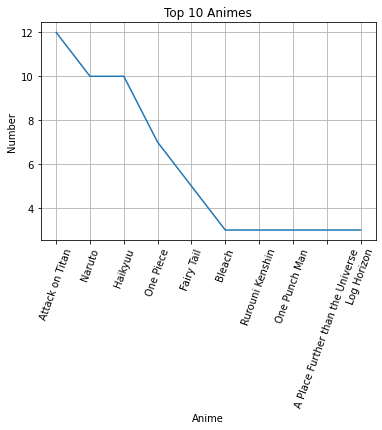

In [9]:
import matplotlib.pyplot as plt


plt.plot(genre)
plt.xlabel("Anime")
plt.ylabel("Number")
plt.title("Top 10 Animes")
plt.xticks(rotation=70)
plt.grid(True)
plt.show()

# ** Starting off Analysis with the second dataset

In [10]:
data2 = pd.read_csv('../input/anime-quotes-dataset/lessreal-data.csv',delimiter=';', skiprows=0, low_memory=False)

In [11]:
data2.head()

,ID,Anime,Character,Quote,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data2.shape

(8760, 12)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           8494 non-null   object
 1   Anime        8436 non-null   object
 2   Character    8366 non-null   object
 3   Quote        8356 non-null   object
 4   Unnamed: 4   2 non-null      object
 5   Unnamed: 5   1 non-null      object
 6   Unnamed: 6   1 non-null      object
 7   Unnamed: 7   1 non-null      object
 8   Unnamed: 8   1 non-null      object
 9   Unnamed: 9   1 non-null      object
 10  Unnamed: 10  1 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 821.4+ KB


In [14]:
data2.isnull().sum()

ID              266
Anime           324
Character       394
Quote           404
Unnamed: 4     8758
Unnamed: 5     8759
Unnamed: 6     8759
Unnamed: 7     8759
Unnamed: 8     8759
Unnamed: 9     8759
Unnamed: 10    8759
Unnamed: 11    8759
dtype: int64

In [15]:
data2.drop(data2.iloc[:,4:12],axis=1,inplace=True) #so here we have removed the unnecesary rows from our dataset to make it more cleaner

In [16]:
data2.head()

,ID,Anime,Character,Quote
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...


In [17]:
data2.drop(['ID'],axis=1)

,Anime,Character,Quote
0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...
...,...,...,...
8755,(Mobile Suit Gundam Seed),Lacus Clyne,Is it weapons that are the cause of all this f...
8756,(Mobile Suit Gundam Seed),Kira Yamato,"What can you protect, if your only weapon are ..."
8757,(Code Geass: Lelouch of the Rebellion),C.C.,Do you know why snow is white..? Because it fo...
8758,(Tengen Toppa Gurren Lagann),Kamina,Don't believe in yourself. Believe in ME who b...


# Cleaning the dataset 

In [18]:
import nltk
import re
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.feature_extraction.text import TfidfTransformer , CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from scipy import sparse
nltk.download('stopwords')
nltk.download('wordnet')

print("All the packages and libraries are load")

All the packages and libraries are load


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
data2.head()

,ID,Anime,Character,Quote
0,0,(Soul Eater),Soul Eater,In the end the shape and form don't matter at ...
1,1,(ReLIFE),Ooga Kazuomi,"I'm still a man too, I wanted to look calm and..."
2,2,(Psycho-Pass Extended Edition),Makishima Shougo,"Clausewitz, he pointed out that no matter how ..."
3,3,(Naruto),Pain,Because of the existence of love - sacrifice i...
4,4,(Detective Conan),Ran Mouri,Courage is a word of justice. It means the qua...


In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8494 non-null   object
 1   Anime      8436 non-null   object
 2   Character  8366 non-null   object
 3   Quote      8356 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


In [21]:
data2['Quote'] = data2['Quote'].astype('string')

In [22]:
data2['Anime'] = data2['Anime'].astype('string')

In [23]:
data2['Character'] = data2['Character'].astype('string')

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8494 non-null   object
 1   Anime      8436 non-null   string
 2   Character  8366 non-null   string
 3   Quote      8356 non-null   string
dtypes: object(1), string(3)
memory usage: 273.9+ KB


In [25]:
data2.isnull().mean()*100

ID           3.036530
Anime        3.698630
Character    4.497717
Quote        4.611872
dtype: float64

In [26]:
 data3 = data2.dropna(axis=0,inplace=False)

In [27]:
data3.isnull().sum()

ID           0
Anime        0
Character    0
Quote        0
dtype: int64

In [28]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8356 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         8356 non-null   object
 1   Anime      8356 non-null   string
 2   Character  8356 non-null   string
 3   Quote      8356 non-null   string
dtypes: object(1), string(3)
memory usage: 326.4+ KB


# Preping the dataset

In [29]:
data3['Quote'] = data3['Quote'].map(lambda x : x.lower()) 

In [30]:
data3['Character'] = data3['Character'].map(lambda x : x.lower())

In [31]:
data3['Anime'] = data3['Anime'].map(lambda x : x.lower())

In [32]:
data3.head()

,ID,Anime,Character,Quote
0,0,(soul eater),soul eater,in the end the shape and form don't matter at ...
1,1,(relife),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,2,(psycho-pass extended edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,3,(naruto),pain,because of the existence of love - sacrifice i...
4,4,(detective conan),ran mouri,courage is a word of justice. it means the qua...


In [33]:
data4 = data3.drop('ID',axis=1)

In [34]:
data4.head()

,Anime,Character,Quote
0,(soul eater),soul eater,in the end the shape and form don't matter at ...
1,(relife),ooga kazuomi,"i'm still a man too, i wanted to look calm and..."
2,(psycho-pass extended edition),makishima shougo,"clausewitz, he pointed out that no matter how ..."
3,(naruto),pain,because of the existence of love - sacrifice i...
4,(detective conan),ran mouri,courage is a word of justice. it means the qua...


# Work in progress